Decision Tree model to classify 

In [1]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from numpy import where
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, recall_score, make_scorer, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier, GradientBoostingClassifier
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc


   length_51  length_52  length_53  length_54  length_55  length_56  \
0   0.000152   0.000081   0.000087   0.000092   0.000099   0.000125   
1   0.006256   0.006413   0.006512   0.006469   0.006810   0.007070   
2   0.003783   0.003886   0.004063   0.004237   0.004481   0.004832   
3   0.004635   0.004471   0.004383   0.004829   0.004920   0.005056   
4   0.011315   0.010045   0.009795   0.009906   0.010630   0.011467   

   length_57  length_58  length_59  length_60  ...  length_392  length_393  \
0   0.000122   0.000115   0.000151   0.000167  ...    0.007396    0.007193   
1   0.007748   0.008088   0.008671   0.008835  ...    0.017830    0.017033   
2   0.004960   0.005605   0.005919   0.006480  ...    0.010957    0.010481   
3   0.005475   0.006158   0.007174   0.007697  ...    0.010032    0.008933   
4   0.013024   0.014853   0.016874   0.017501  ...    0.009118    0.008535   

   length_394  length_395  length_396  length_397  length_398  length_399  \
0    0.006973    0.006481  

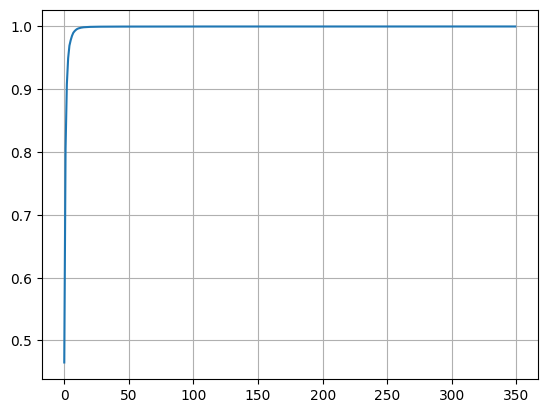

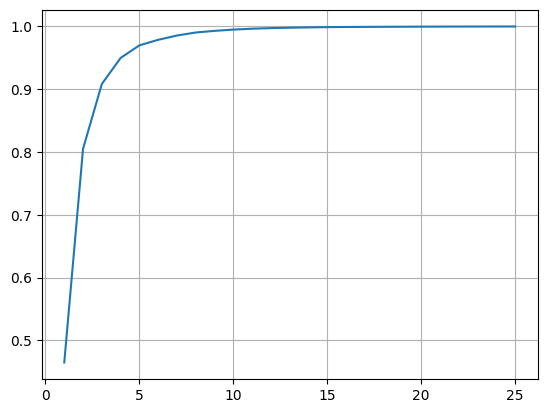

350
['length_55', 'length_56', 'length_57', 'length_58', 'length_59', 'length_60', 'length_61', 'length_62', 'length_63', 'length_64', 'length_65', 'length_66', 'length_67', 'length_68', 'length_69', 'length_70', 'length_71', 'length_72', 'length_73', 'length_74', 'length_75', 'length_76', 'length_77', 'length_78', 'length_79', 'length_80', 'length_81', 'length_82', 'length_83', 'length_84', 'length_85', 'length_86', 'length_87', 'length_88', 'length_89', 'length_90', 'length_91', 'length_92', 'length_93', 'length_94', 'length_95', 'length_96', 'length_97', 'length_98', 'length_99', 'length_100', 'length_101', 'length_102', 'length_103', 'length_104', 'length_105', 'length_106', 'length_107', 'length_108', 'length_109', 'length_110', 'length_111', 'length_112', 'length_113', 'length_114', 'length_115', 'length_116', 'length_117', 'length_118', 'length_119', 'length_120', 'length_121', 'length_122', 'length_123', 'length_124', 'length_125', 'length_126', 'length_127', 'length_128', 'len

In [266]:
%run HealthyvsCancer.ipynb

In [515]:
train_x = xvals_train_filtered
train_y = yvals_train
print(train_y)
print(test_y)

test_y = yvals_test
test_x = xvals_test_filtered

class_counts = train_y.value_counts()
print(class_counts)

class_counts = test_y.value_counts()
print(class_counts)

0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
2188     cancer
2189     cancer
2190     cancer
2191     cancer
2192     cancer
Name: class_label, Length: 2193, dtype: object
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
1029     cancer
1030     cancer
1031     cancer
1032     cancer
1033     cancer
Name: class_label, Length: 1034, dtype: object
class_label
cancer     2133
healthy      60
Name: count, dtype: int64
class_label
cancer     993
healthy     41
Name: count, dtype: int64


In [425]:
DT_clf = RandomForestClassifier()
DT_clf.fit(train_x, train_y)
y_pred = DT_clf.predict(test_x)
print(classification_report(test_y, y_pred, target_names= ['Cancer', 'Healthy']))

              precision    recall  f1-score   support

      Cancer       0.96      0.99      0.98       993
     Healthy       0.42      0.12      0.19        41

    accuracy                           0.96      1034
   macro avg       0.69      0.56      0.58      1034
weighted avg       0.94      0.96      0.95      1034



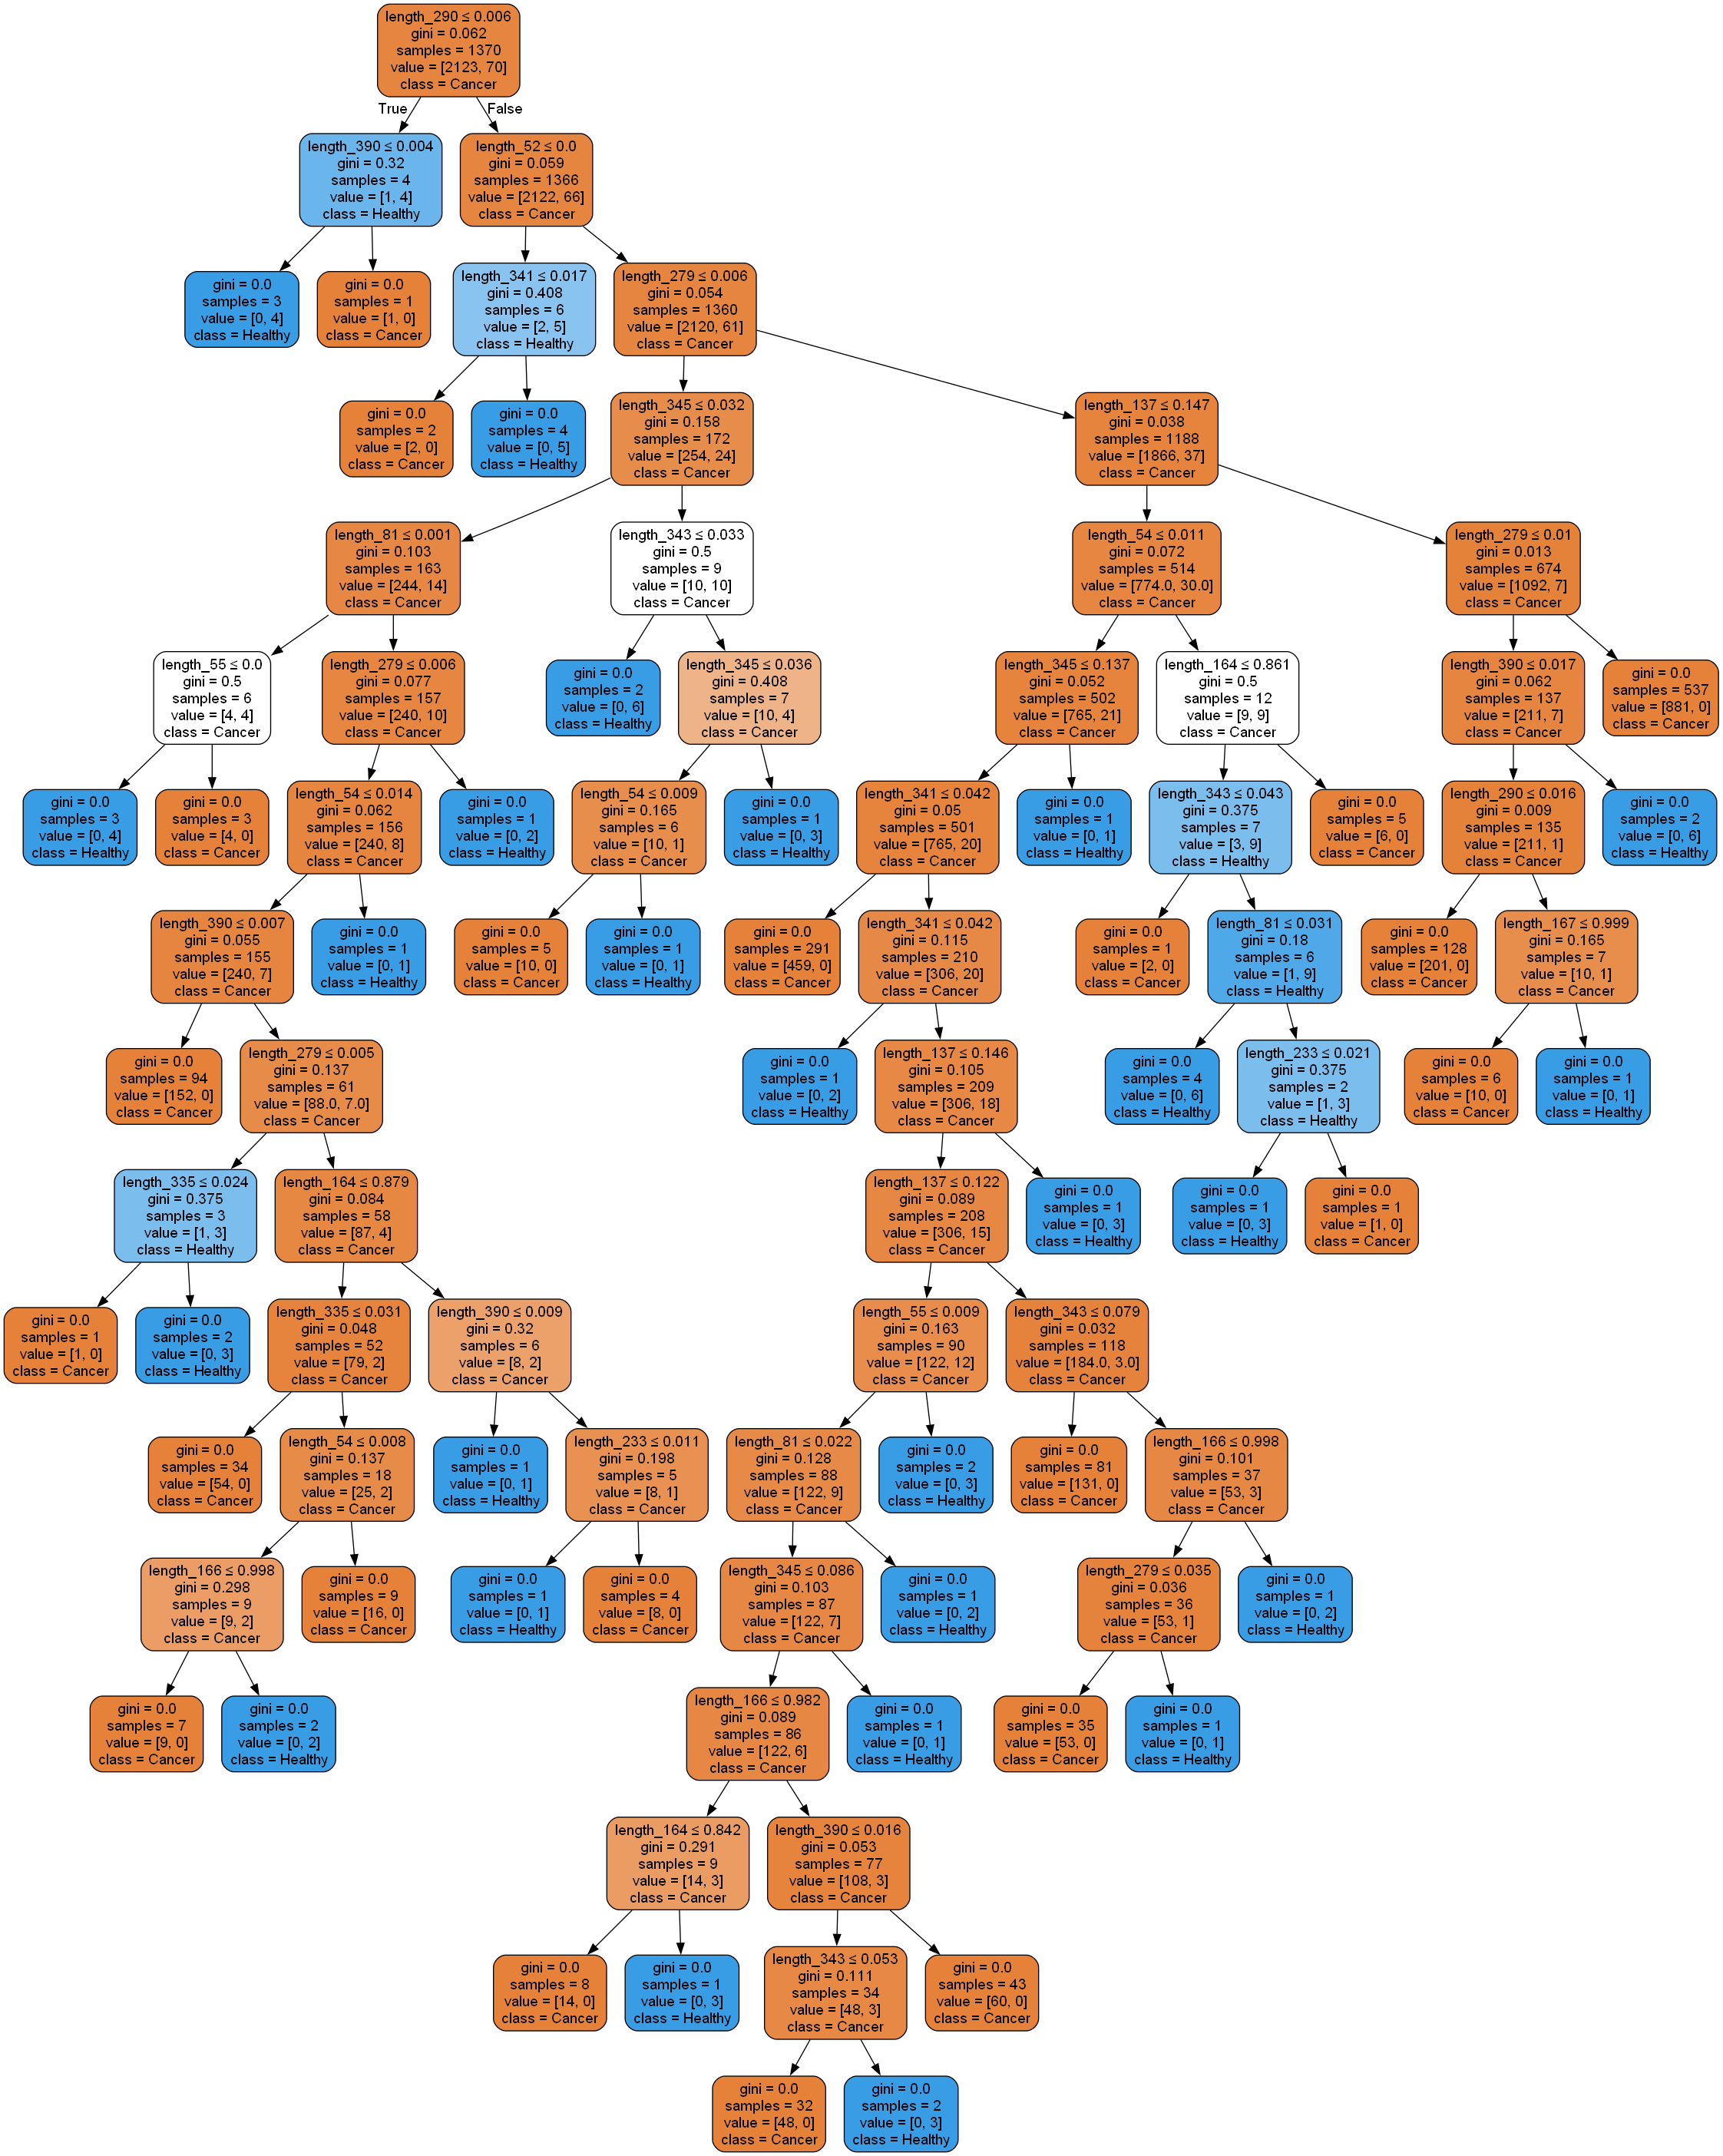

In [426]:
# Train the Random Forest classifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(train_x, train_y)

# Get feature importances
feature_importances = random_forest_classifier.feature_importances_

# Find the index of the most important feature
most_important_feature_index = feature_importances.argmax()

# Get the decision tree that uses the most important feature
most_important_tree = random_forest_classifier.estimators_[most_important_feature_index]

# Visualize the decision tree
dot_data = StringIO()
export_graphviz(most_important_tree, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, 
                feature_names=train_x.columns, 
                class_names=['Cancer', 'Healthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if '"\\n"' in graph.obj_dict['nodes']:
    graph.del_node('"\\n"')
graph.write_png('best_decision_tree.png')
Image(graph.create_png())

In [427]:
predictions = most_important_tree.predict(test_x)
predictions = ['cancer' if pred == 0 else 'healthy' for pred in predictions]
# Generate and print the classification report
print("Classification Report for the Best Tree:")
print(classification_report(test_y, predictions, target_names=["Cancer", "Healthy"]))

Classification Report for the Best Tree:
              precision    recall  f1-score   support

      Cancer       0.97      0.96      0.97       993
     Healthy       0.23      0.29      0.26        41

    accuracy                           0.93      1034
   macro avg       0.60      0.63      0.61      1034
weighted avg       0.94      0.93      0.94      1034



c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [428]:
# Define pipeline for SMOTE 
smote_rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])
custom_scorer = make_scorer(f1_score, pos_label='cancer')
# Define parameter grid for SMOTE
param_grid = {
    'smote__k_neighbors': [1, 3, 5, 7],  # Number of nearest neighbors to use in SMOTE
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(smote_rf_pipeline, param_grid, cv=5, scoring= custom_scorer)
grid_search.fit(train_x, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'smote__k_neighbors': 1}
Best Score: 0.9520792519345223


In [429]:
smote = SMOTE(k_neighbors=grid_search.best_params_['smote__k_neighbors'])
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
train_y_smote = train_y_smote
class_counts = train_y_smote.value_counts()
print(class_counts)
print(type(train_y_smote))
print(train_y_smote)

class_label
healthy    2133
cancer     2133
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
4261    healthy
4262    healthy
4263    healthy
4264    healthy
4265    healthy
Name: class_label, Length: 4266, dtype: object


In [430]:
# Initialize Near-Miss with a range of n_neighbors values
near_miss = NearMiss(sampling_strategy='auto', version=1)
param_grid = {'sampling__n_neighbors': [1, 3, 5, 7]}

custom_scorer = make_scorer(f1_score, pos_label='cancer')
# Create a pipeline with Near-Miss and KNN classifier
pipeline = Pipeline([
    ('sampling', near_miss),
    ('classifier', RandomForestClassifier())  
])

# Perform grid search
nm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring= custom_scorer)
nm_grid_search.fit(train_x_smote, train_y_smote)

best_params_near_miss = nm_grid_search.best_params_
print(best_params_near_miss)

{'sampling__n_neighbors': 7}


In [431]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Define parameter grid
param_grid_enn = {
    'sampling__n_neighbors': [1, 3, 5, 7]
}

custom_scorer = make_scorer(f1_score, pos_label='cancer')

# Create a pipeline with ENN and KNN classifier
pipeline_enn = Pipeline([
    ('sampling', enn),
    ('classifier', RandomForestClassifier())
])

# Perform grid search
grid_search_enn = GridSearchCV(pipeline_enn, param_grid_enn, cv=5, scoring= custom_scorer)
grid_search_enn.fit(train_x_smote, train_y_smote)

# Get the best parameters
best_params_enn = grid_search_enn.best_params_
print(best_params_enn)

{'sampling__n_neighbors': 1}


In [432]:
near_miss = NearMiss(sampling_strategy='auto', version=1, n_neighbors= best_params_near_miss['sampling__n_neighbors'])
tomek_links = TomekLinks(sampling_strategy='auto')
enn = EditedNearestNeighbours(n_neighbors= best_params_enn['sampling__n_neighbors'], )

custom_undersampler_pipeline = Pipeline([
    ('near_miss', near_miss),
    ('tomek_links', tomek_links),
    ('enn', enn)
])

In [433]:
train_x, train_y = custom_undersampler_pipeline.fit_resample(train_x_smote, train_y_smote)

#train_y = train_y.map({1: 'cancer', 0: 'healthy'})
counts = train_y.value_counts()
print(counts)

class_label
healthy    2126
cancer     2078
Name: count, dtype: int64


In [434]:
DT_clf = RandomForestClassifier()
DT_clf.fit(train_x, train_y)
y_pred = DT_clf.predict(test_x)
print(classification_report(test_y, y_pred, target_names= ["Cancer", "Healthy"]))


              precision    recall  f1-score   support

      Cancer       0.98      0.95      0.97       993
     Healthy       0.29      0.46      0.36        41

    accuracy                           0.93      1034
   macro avg       0.63      0.71      0.66      1034
weighted avg       0.95      0.93      0.94      1034



In [435]:
custom_recall = make_scorer(f1_score, pos_label='cancer')

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}

# Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier()

# Perform grid search with significant parameters
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5, scoring=custom_recall)
grid_search_rf.fit(train_x, train_y)

# Print the best parameters found by GridSearchCV
print("Best parameters (GridSearchCV):", grid_search_rf.best_params_)

Best parameters (GridSearchCV): {'max_depth': None, 'n_estimators': 50}


In [437]:
optimised_DT = RandomForestClassifier(max_depth= grid_search_rf.best_params_['max_depth'],
                                      n_estimators = grid_search_rf.best_params_['n_estimators'] )

pos_label = 'cancer'
optimised_DT.fit(train_x, train_y)
y_pred = optimised_DT.predict(test_x)
recall = f1_score(test_y, y_pred, pos_label=pos_label)
print("F1 score for testing dataset after tuning: {:.2f}".format(recall))

F1 score for testing dataset after tuning: 0.96


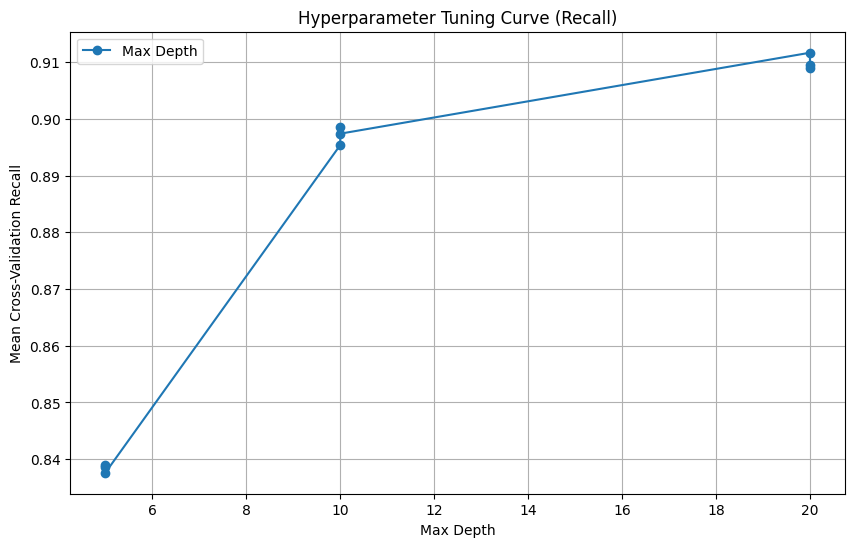

In [438]:
# Extract mean test recall scores and corresponding hyperparameters from grid search results
mean_test_recall = grid_search_rf.cv_results_['mean_test_score']
params = grid_search_rf.cv_results_['params']

# Extract the values of max_depth, min_samples_split, and min_samples_leaf from the params
max_depth_values = [param['max_depth'] for param in params]

# Plot the hyperparameter tuning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_test_recall, marker='o', linestyle='-', label='Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Cross-Validation Recall')
plt.title('Hyperparameter Tuning Curve (Recall)')
plt.legend()
plt.grid(True)
plt.show()

In [439]:
# Assume rf_classifier is your RandomForestClassifier instance
custom_scorer = make_scorer(f1_score, pos_label='cancer')
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(optimised_DT, train_x, train_y, cv=5, scoring= custom_scorer)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.98058252 0.94012739 0.94645081 0.91094148 0.7715736 ]
Mean CV Score: 0.9099351604318541
Standard Deviation of CV Scores: 0.07263738187973691


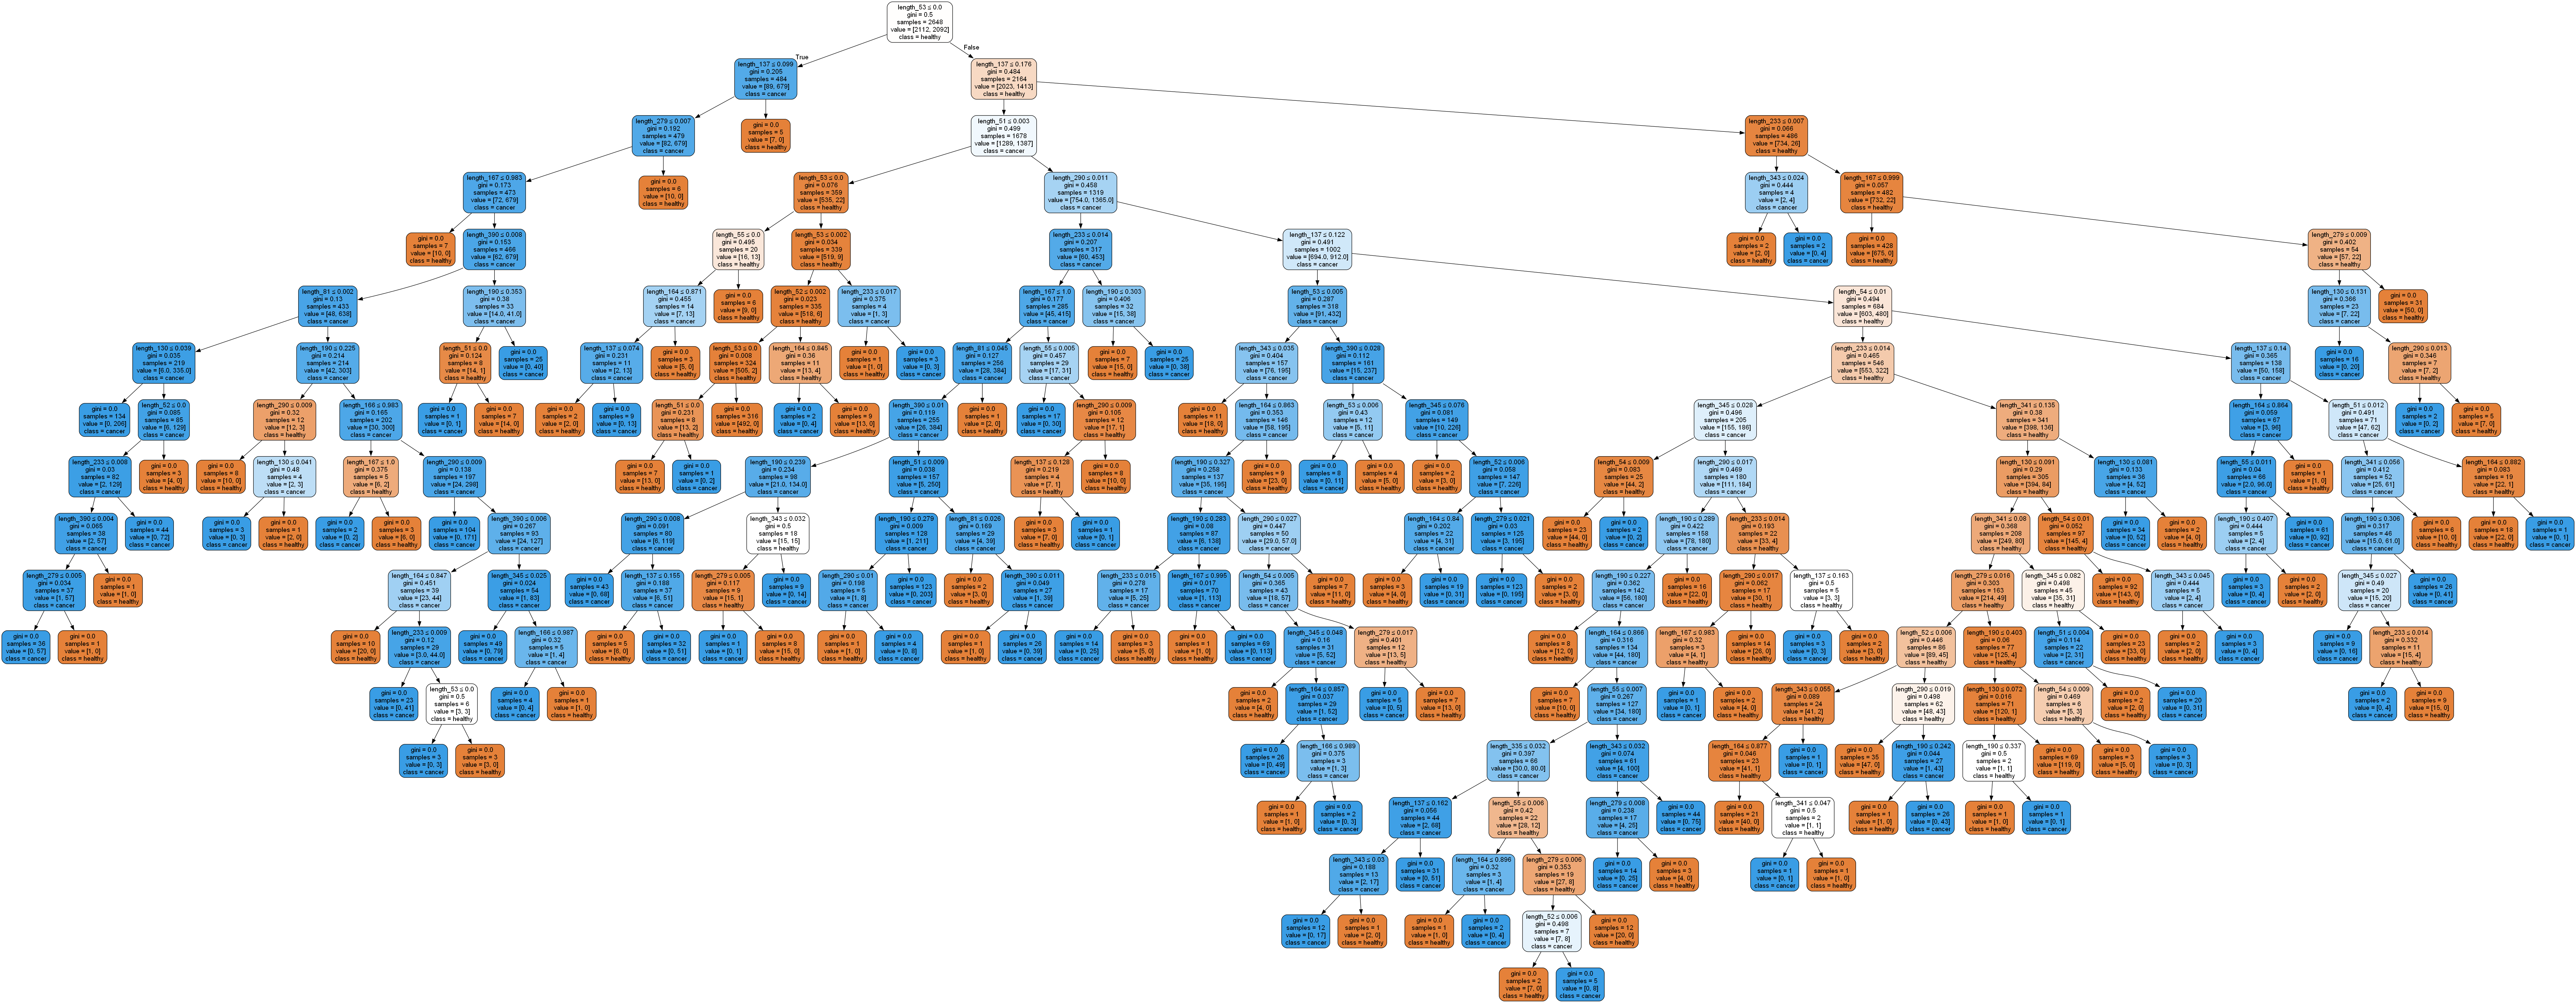

In [443]:
tree_in_forest = optimised_DT.estimators_[10]

dot_data = StringIO()
export_graphviz(tree_in_forest, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, 
                feature_names=train_x.columns, 
                class_names=['healthy', 'cancer'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if '"\\n"' in graph.obj_dict['nodes']:
    graph.del_node('"\\n"')
graph.write_png('cancer.png')
Image(graph.create_png())




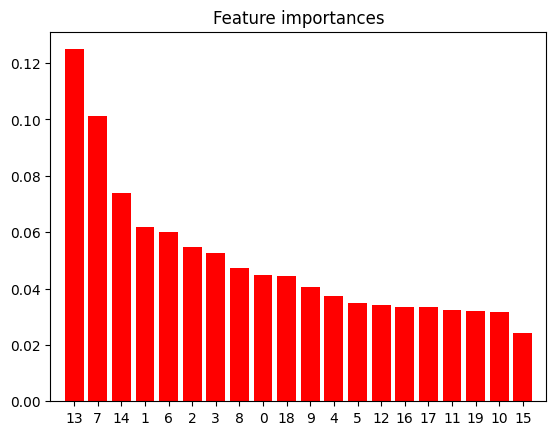

In [441]:
importances = optimised_DT.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_x.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(train_x.shape[1]), indices)
plt.xlim([-1, train_x.shape[1]])
plt.show()

In [444]:
train_x = xvals_train_filtered
train_y = yvals_train
print(train_y)
print(test_y)

test_y = yvals_test
test_x = xvals_test_filtered

class_counts = train_y.value_counts()
print(class_counts)

class_counts = test_y.value_counts()
print(class_counts)

0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
2188     cancer
2189     cancer
2190     cancer
2191     cancer
2192     cancer
Name: class_label, Length: 2193, dtype: object
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
1029     cancer
1030     cancer
1031     cancer
1032     cancer
1033     cancer
Name: class_label, Length: 1034, dtype: object
class_label
cancer     2133
healthy      60
Name: count, dtype: int64
class_label
cancer     993
healthy     41
Name: count, dtype: int64


In [446]:
custom_scorer = make_scorer(f1_score, pos_label='cancer')

In [447]:
base_classifier = DecisionTreeClassifier(max_depth=3)
adaboost_classifier = AdaBoostClassifier(estimator= base_classifier, algorithm='SAMME')

cv_scores = cross_val_score(adaboost_classifier, train_x, train_y, cv=5, scoring=custom_scorer)
best_tree_index = cv_scores.argmax()
adaboost_classifier.fit(train_x, train_y)
best_tree_predictions = adaboost_classifier.estimators_[best_tree_index].predict(test_x)
print(classification_report(test_y, best_tree_predictions, target_names=["Cancer", "Healthy"]))



              precision    recall  f1-score   support

      Cancer       0.96      0.99      0.98       993
     Healthy       0.33      0.07      0.12        41

    accuracy                           0.96      1034
   macro avg       0.65      0.53      0.55      1034
weighted avg       0.94      0.96      0.94      1034



c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


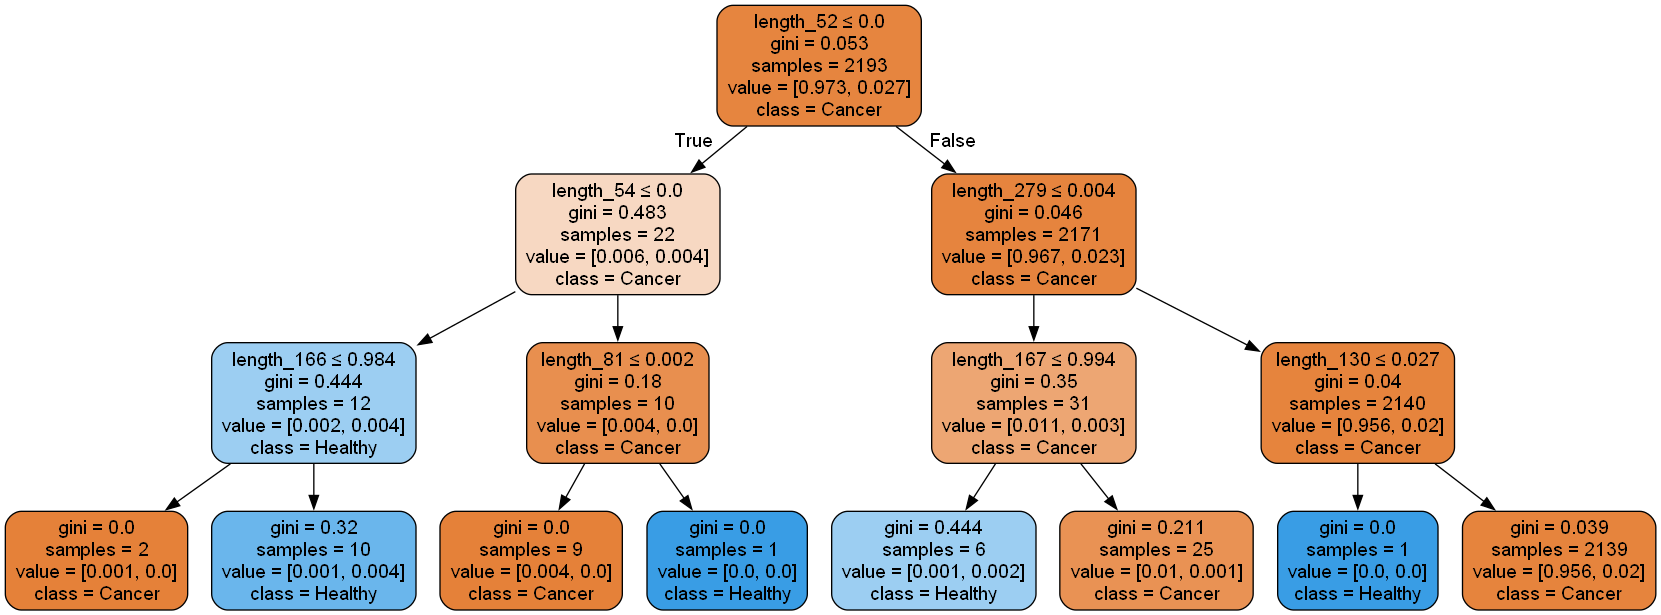

In [448]:
best_tree = adaboost_classifier.estimators_[best_tree_index]
dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, 
                feature_names=train_x.columns, 
                class_names=['Cancer', 'Healthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if '"\\n"' in graph.obj_dict['nodes']:
    graph.del_node('"\\n"')
graph.write_png('best_decision_tree.png')
Image(graph.create_png())

In [450]:
# Define pipeline for SMOTE 
smote_rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', AdaBoostClassifier(algorithm= 'SAMME'))
])

# Define parameter grid for SMOTE
param_grid = {
    'smote__k_neighbors': [1, 3, 5, 7],  # Number of nearest neighbors to use in SMOTE
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(smote_rf_pipeline, param_grid, cv=5, scoring= custom_scorer)
grid_search.fit(train_x, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'smote__k_neighbors': 1}
Best Score: 0.8998526937240795


In [451]:
smote = SMOTE(k_neighbors=grid_search.best_params_['smote__k_neighbors'])
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
train_y_smote = train_y_smote
class_counts = train_y_smote.value_counts()
print(class_counts)
print(type(train_y_smote))
print(train_y_smote)

class_label
healthy    2133
cancer     2133
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
4261    healthy
4262    healthy
4263    healthy
4264    healthy
4265    healthy
Name: class_label, Length: 4266, dtype: object


In [452]:
# Initialize Near-Miss with a range of n_neighbors values
near_miss = NearMiss(sampling_strategy='auto', version=1)
param_grid = {'sampling__n_neighbors': [1, 3, 5, 7]}

# Create a pipeline with Near-Miss and KNN classifier
pipeline = Pipeline([
    ('sampling', near_miss),
    ('classifier', AdaBoostClassifier(algorithm= 'SAMME'))  
])

# Perform grid search
nm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring= custom_scorer)
nm_grid_search.fit(train_x_smote, train_y_smote)

best_params_near_miss = nm_grid_search.best_params_
print(best_params_near_miss)

{'sampling__n_neighbors': 1}


In [453]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Define parameter grid
param_grid_enn = {
    'sampling__n_neighbors': [1, 3, 5, 7]
}

# Create a pipeline with ENN and KNN classifier
pipeline_enn = Pipeline([
    ('sampling', enn),
    ('classifier', AdaBoostClassifier(algorithm= 'SAMME'))
])

# Perform grid search
grid_search_enn = GridSearchCV(pipeline_enn, param_grid_enn, cv=5, scoring= custom_scorer)
grid_search_enn.fit(train_x_smote, train_y_smote)

# Get the best parameters
best_params_enn = grid_search_enn.best_params_
print(best_params_enn)

{'sampling__n_neighbors': 1}


In [454]:
near_miss = NearMiss(sampling_strategy='auto', version=1, n_neighbors= best_params_near_miss['sampling__n_neighbors'])
tomek_links = TomekLinks(sampling_strategy='auto')
enn = EditedNearestNeighbours(n_neighbors= best_params_enn['sampling__n_neighbors'], )

custom_undersampler_pipeline = Pipeline([
    ('near_miss', near_miss),
    ('tomek_links', tomek_links),
    ('enn', enn)
])

In [455]:
train_x_resampled, train_y_resampled = custom_undersampler_pipeline.fit_resample(train_x_smote, train_y_smote)

#train_y = train_y.map({1: 'cancer', 0: 'healthy'})
counts = train_y_resampled.value_counts()
print(counts)

class_label
healthy    2129
cancer     2077
Name: count, dtype: int64


In [460]:
base_classifier = DecisionTreeClassifier(max_depth=3)
adaboost_classifier = AdaBoostClassifier(estimator= base_classifier, algorithm='SAMME')

cv_scores = cross_val_score(adaboost_classifier, train_x_resampled, train_y_resampled, cv=5, scoring=custom_scorer)
best_tree_index = cv_scores.argmax()
adaboost_classifier.fit(train_x_resampled, train_y_resampled)
best_tree_predictions = adaboost_classifier.estimators_[best_tree_index].predict(test_x)
print(classification_report(test_y, best_tree_predictions, target_names=["Cancer", "Healthy"]))

              precision    recall  f1-score   support

      Cancer       0.97      0.93      0.95       993
     Healthy       0.19      0.37      0.25        41

    accuracy                           0.91      1034
   macro avg       0.58      0.65      0.60      1034
weighted avg       0.94      0.91      0.92      1034



c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


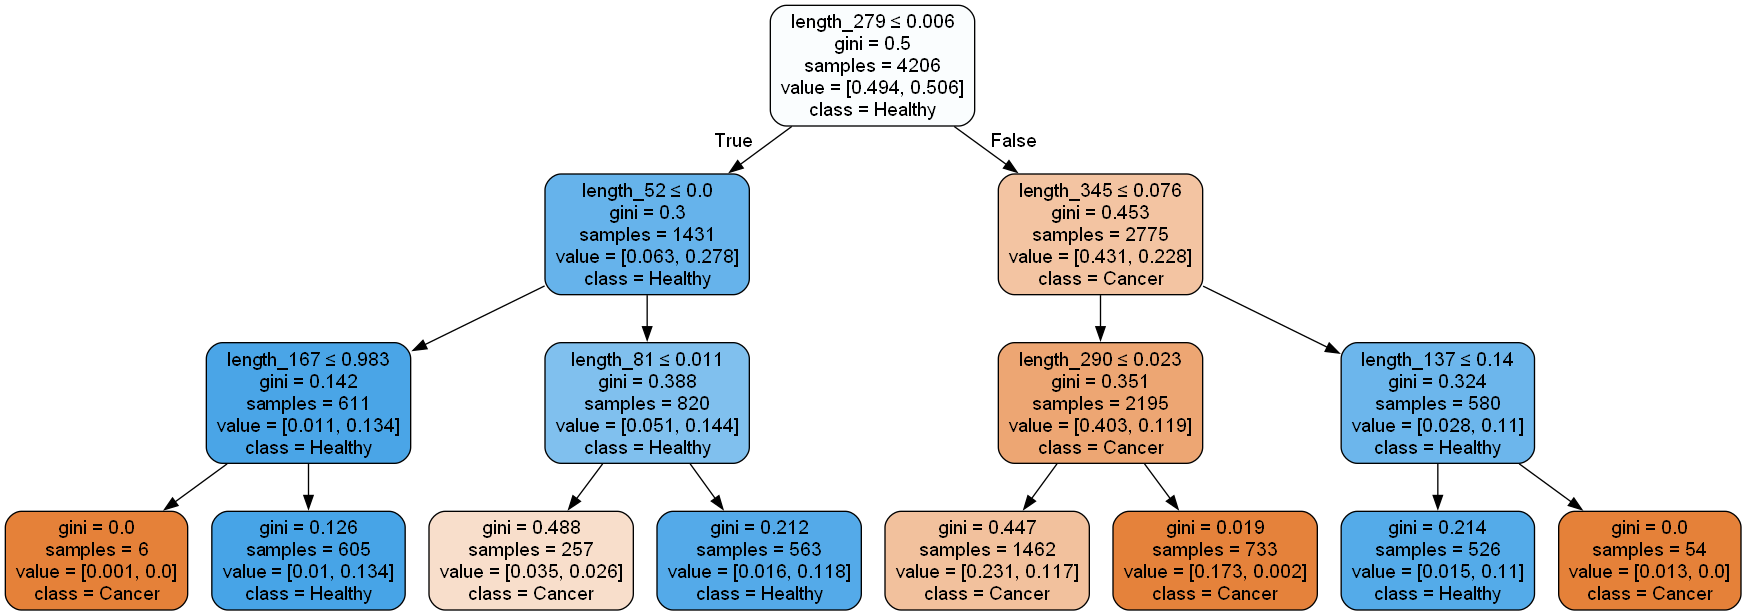

In [461]:
best_tree = adaboost_classifier.estimators_[best_tree_index]
dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, 
                feature_names=train_x.columns, 
                class_names=['Cancer', 'Healthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if '"\\n"' in graph.obj_dict['nodes']:
    graph.del_node('"\\n"')
graph.write_png('best_decision_tree.png')
Image(graph.create_png())

In [458]:
# Define pipeline for SMOTE 
smote_rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier())
])

# Define parameter grid for SMOTE
param_grid = {
    'smote__k_neighbors': [1, 3, 5, 7],  # Number of nearest neighbors to use in SMOTE
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(smote_rf_pipeline, param_grid, cv=5, scoring= custom_scorer)
grid_search.fit(train_x, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'smote__k_neighbors': 1}
Best Score: 0.9317310137746702


In [459]:
smote = SMOTE(k_neighbors=grid_search.best_params_['smote__k_neighbors'])
train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
train_y_smote = train_y_smote
class_counts = train_y_smote.value_counts()
print(class_counts)
print(type(train_y_smote))
print(train_y_smote)

class_label
healthy    2133
cancer     2133
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
4261    healthy
4262    healthy
4263    healthy
4264    healthy
4265    healthy
Name: class_label, Length: 4266, dtype: object


In [462]:
# Initialize Near-Miss with a range of n_neighbors values
near_miss = NearMiss(sampling_strategy='auto', version=1)
param_grid = {'sampling__n_neighbors': [1, 3, 5, 7]}

# Create a pipeline with Near-Miss and KNN classifier
pipeline = Pipeline([
    ('sampling', near_miss),
    ('classifier', GradientBoostingClassifier())  
])

# Perform grid search
nm_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring= custom_scorer)
nm_grid_search.fit(train_x_smote, train_y_smote)

best_params_near_miss = nm_grid_search.best_params_
print(best_params_near_miss)

{'sampling__n_neighbors': 5}


In [463]:
# Initialize ENN
enn = EditedNearestNeighbours()

# Define parameter grid
param_grid_enn = {
    'sampling__n_neighbors': [1, 3, 5, 7]
}

# Create a pipeline with ENN and KNN classifier
pipeline_enn = Pipeline([
    ('sampling', enn),
    ('classifier', GradientBoostingClassifier())
])

# Perform grid search
grid_search_enn = GridSearchCV(pipeline_enn, param_grid_enn, cv=5, scoring= custom_scorer)
grid_search_enn.fit(train_x_smote, train_y_smote)

# Get the best parameters
best_params_enn = grid_search_enn.best_params_
print(best_params_enn)

{'sampling__n_neighbors': 1}


In [466]:
near_miss = NearMiss(sampling_strategy='auto', version=1, n_neighbors= best_params_near_miss['sampling__n_neighbors'])
tomek_links = TomekLinks(sampling_strategy='auto')
enn = EditedNearestNeighbours(n_neighbors= best_params_enn['sampling__n_neighbors'], )

custom_undersampler_pipeline = Pipeline([
    ('near_miss', near_miss),
    ('tomek_links', tomek_links),
    ('enn', enn)
])

In [467]:
train_x_resampled, train_y_resampled = custom_undersampler_pipeline.fit_resample(train_x_smote, train_y_smote)

#train_y = train_y.map({1: 'cancer', 0: 'healthy'})
counts = train_y_resampled.value_counts()
print(counts)

class_label
healthy    2127
cancer     2074
Name: count, dtype: int64


In [474]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': np.logspace(-3, -1, 3),  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of the trees
}

# Initialize Gradient Boosting Classifier
gradientboosting_classifier = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(gradientboosting_classifier, param_dist, cv=5, scoring=custom_scorer, n_iter=15)
random_search.fit(train_x_resampled, train_y_resampled)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=15,
                   param_distributions={'learning_rate': array([0.001, 0.01 , 0.1  ]),
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring=make_scorer(f1_score, response_method='predict', pos_label=cancer))

In [477]:
# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)
# Get the best score
best_score = random_search.best_score_
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.9357683175314385


In [478]:

# Train the model with the best parameters
best_gradientboosting_classifier = GradientBoostingClassifier(**best_params, random_state=42)
best_gradientboosting_classifier.fit(train_x_resampled, train_y_resampled)

# Make predictions using the best model
predictions = best_gradientboosting_classifier.predict(test_x)
print("Classification Report:")
print(classification_report(test_y, predictions, target_names=["Cancer", "Healthy"]))

Classification Report:
              precision    recall  f1-score   support

      Cancer       0.98      0.92      0.95       993
     Healthy       0.21      0.49      0.29        41

    accuracy                           0.91      1034
   macro avg       0.59      0.71      0.62      1034
weighted avg       0.95      0.91      0.92      1034



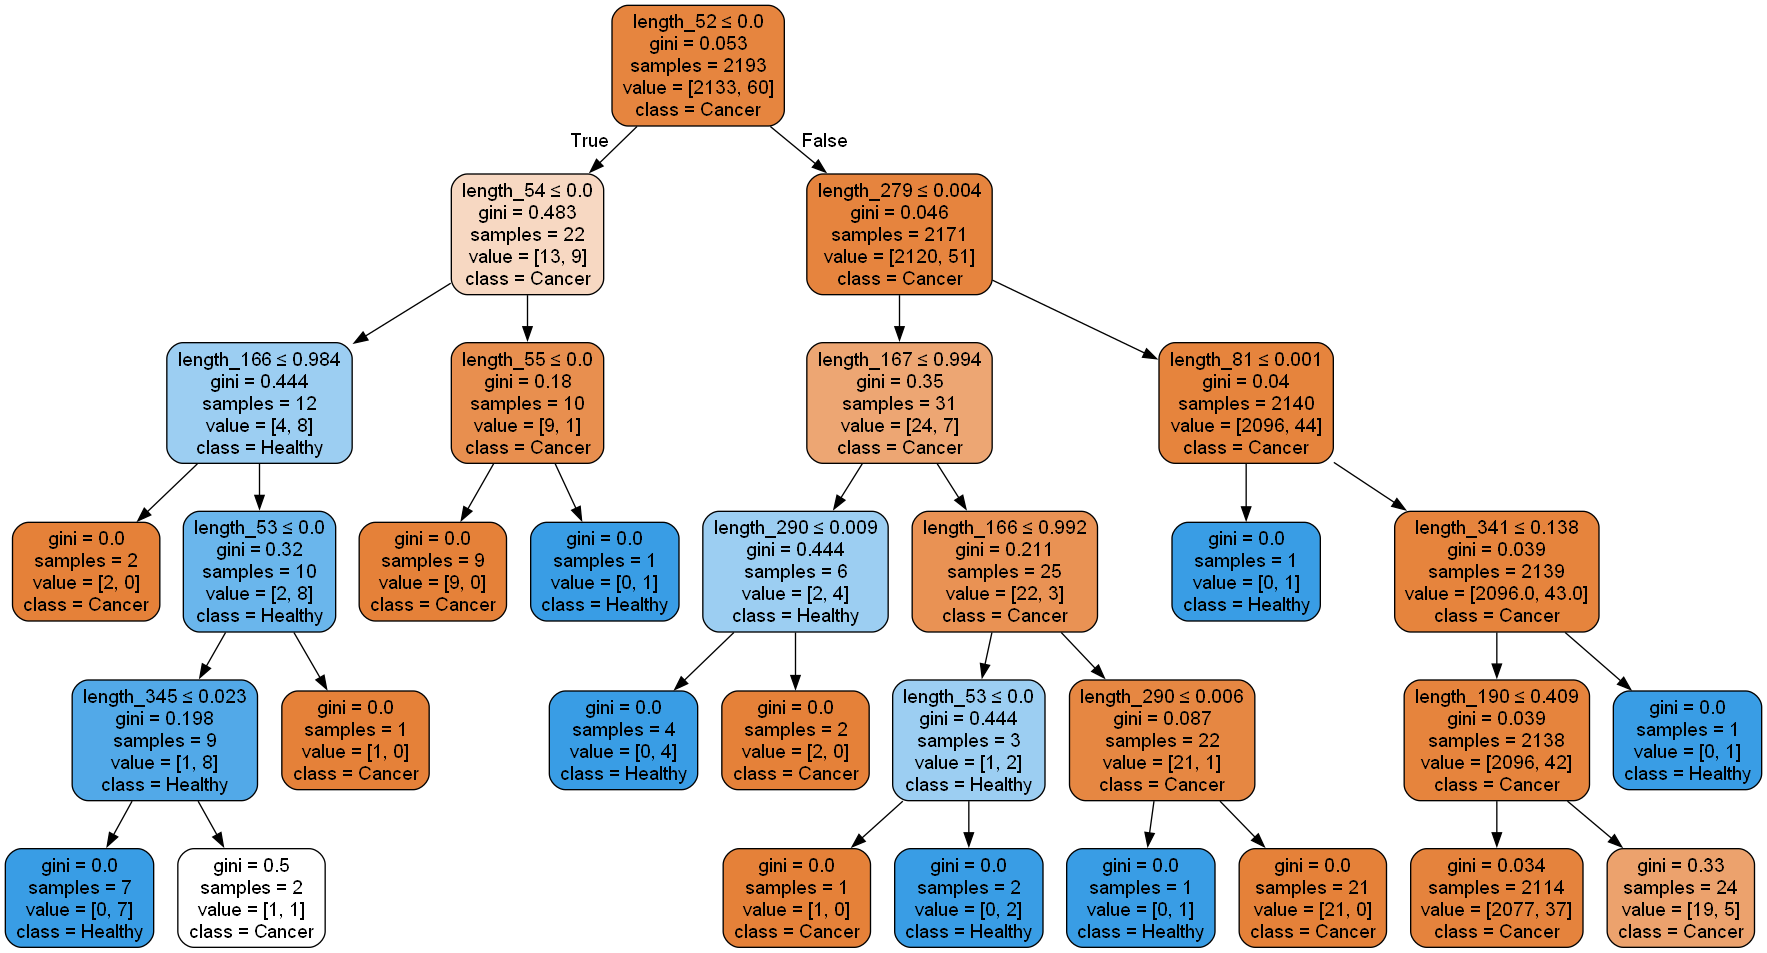

In [480]:
# Get the best gradient boosting classifier from the grid search
best_gradientboosting_classifier = random_search.best_estimator_

# Get the first decision tree classifier in the ensemble
tree_classifier = best_gradientboosting_classifier.estimators_[0][0]

best_tree_gb = DecisionTreeClassifier(
    criterion='gini',  # Use 'gini' or 'entropy'
    max_depth=tree_classifier.max_depth,
    min_samples_split=tree_classifier.min_samples_split,
    min_samples_leaf=tree_classifier.min_samples_leaf,
    max_features=tree_classifier.max_features,
    random_state=tree_classifier.random_state
)

# Fit the classifier to the training data (if needed)
best_tree_gb.fit(train_x, train_y)



# Visualize the decision tree
dot_data = StringIO()
export_graphviz(best_tree_gb, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, 
                feature_names=train_x.columns, 
                class_names=['Cancer', 'Healthy'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
if '"\\n"' in graph.obj_dict['nodes']:
    graph.del_node('"\\n"')
graph.write_png('best_gradient_boosting_tree.png')
Image(graph.create_png())

c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


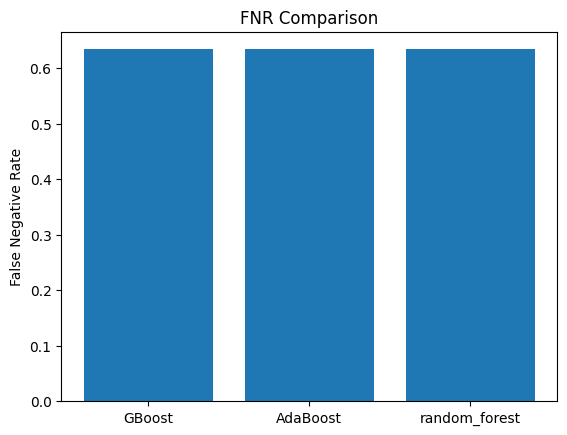

In [512]:

# Assume best_gradientboosting_classifier and best_adaboost_classifier are your trained models
models = [best_tree_gb, best_tree, tree_in_forest]
model_names = ['GBoost', 'AdaBoost', 'random_forest']
fnr_values = []
#label_mapping = ['Helathy', 'Cancer']
label_mapping = { 0.0 : 'healthy', 1.0: 'cancer'}

for model in models:
    # Make predictions
    y_pred = model.predict(test_x)

    # Convert numeric predictions to string labels
    y_pred = pd.Series(y_pred).map(label_mapping)

    # Calculate FNR and append to list
    fnr = fn / (fn + tp)
    fnr_values.append(fnr)

# Plot FNR for both models
plt.bar(model_names, fnr_values)
plt.ylabel('False Negative Rate')
plt.title('FNR Comparison')
plt.show()

c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


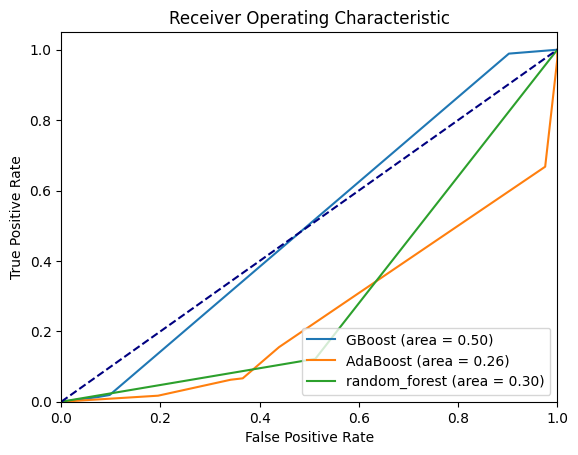

In [518]:
models = [best_tree_gb, best_tree, tree_in_forest]
model_names = ['GBoost', 'AdaBoost', 'random_forest']

plt.figure()

# For each model
for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict_proba(test_x)[:, 1]  # probabilities for the positive outcome

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(test_y, y_pred, pos_label='cancer')
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()    

In [507]:
print(y_pred)

print(test_y)

print(test_x)

[1. 1. 1. ... 1. 0. 0.]
0       healthy
1       healthy
2       healthy
3       healthy
4       healthy
         ...   
1029     cancer
1030     cancer
1031     cancer
1032     cancer
1033     cancer
Name: class_label, Length: 1034, dtype: object
      length_51  length_52  length_53  length_54  length_55  length_81  \
0      0.005657   0.005277   0.005162   0.005267   0.005287   0.017664   
1      0.005132   0.004886   0.004952   0.005123   0.005237   0.018350   
2      0.006114   0.005463   0.005444   0.005369   0.005425   0.019648   
3      0.000158   0.000089   0.000085   0.000097   0.000107   0.001347   
4      0.000215   0.000116   0.000129   0.000144   0.000160   0.001895   
...         ...        ...        ...        ...        ...        ...   
1029   0.006006   0.005810   0.005518   0.005779   0.006290   0.023776   
1030   0.005452   0.005260   0.005178   0.005271   0.005540   0.021749   
1031   0.004707   0.004747   0.004575   0.004730   0.005116   0.020093   
1032   0.0040

In [508]:
for label in y_pred:
    print(label)

1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
